In [1]:
import pandas as pd
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.utils import shuffle

In [4]:
classes = ['mountain','street','glacier','buildings','sea','forest']

In [5]:
class_label = {'mountain':0,'street':1,'glacier':2,'buildings':3,'sea':4,'forest':5}
num_lb = 6

In [6]:
def load_data():
    datasets = ['seg_train/seg_train','seg_test/seg_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory =  os.path.join('C:' + dataset)
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_label[folder]
            for file in os.listdir(directory + '/' + folder):
                img_path = directory + '/' + folder + '/' + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img,size)
                images.append(curr_img)
                labels.append(curr_label)
        images,labels = shuffle(images,labels)
        images = np.array(images,dtype = 'float32')
        labels = np.array(labels,dtype = 'int32')
        output.append((images,labels))
        
    return output

In [7]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [13]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


In [14]:
import matplotlib.pyplot as plt

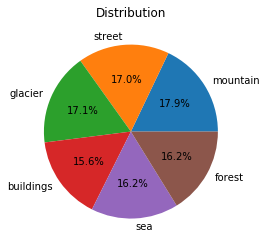

In [15]:
np.bincount(train_labels)

plt.pie(np.bincount(train_labels),labels = classes,autopct='%1.1f%%')

plt.title('Distribution')

plt.show()

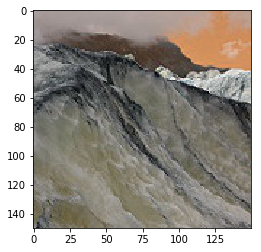

In [16]:
plt.imshow(train_images[3]/255.0)

In [12]:
# train_labels[3]

In [19]:
train_images.shape,test_images.shape

((14034, 150, 150, 3), (3000, 150, 150, 3))

In [20]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images/255.0
test_images = test_images/255.0

In [21]:
model = tf.keras.Sequential([
    
                             tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150, 150, 3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Conv2D(128,kernel_size = (3,3),activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(units=6,activation = 'softmax')
                                  ])

W1022 15:42:42.353622 11208 deprecation.py:506] From F:\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/20
11227/11227 [==============================] - 803s 72ms/sample - loss: 1.1776 - acc: 0.5329 - val_loss: 0.8811 - val_acc: 0.6644
Epoch 2/20
11227/11227 [==============================] - 504s 45ms/sample - loss: 0.8488 - acc: 0.6843 - val_loss: 0.7390 - val_acc: 0.7328
Epoch 3/20
11227/11227 [==============================] - 377s 34ms/sample - loss: 0.6753 - acc: 0.7509 - val_loss: 0.5948 - val_acc: 0.7752
Epoch 4/20
11227/11227 [==============================] - 364s 32ms/sample - loss: 0.5749 - acc: 0.7910 - val_loss: 0.6420 - val_acc: 0.7798
Epoch 5/20
11227/11227 [==============================] - 2923s 260ms/sample - loss: 0.4798 - acc: 0.8295 - val_loss: 0.7592 - val_acc: 0.7439
Epoch 6/20
11227/11227 [==============================] - 375s 33ms/sample - loss: 0.4523 - acc: 0.8357 - val_loss: 0.6028 - val_acc: 0.7930
Epoch 7/20
11227/11227 [==============================] - 362s 32ms/sample - loss: 0.3266 - acc: 0.8836

In [24]:
test_loss = model.evaluate(test_images, test_labels)

3000/3000 [==============================] - 73s 24ms/sample - loss: 1.0132 - acc: 0.8147


In [25]:
predictions = model.predict(test_images)     
pred_labels = np.argmax(predictions, axis = 1) 


In [26]:
BOO = test_labels == pred_labels

In [27]:
mislabeled_indices = np.where(BOO == 0)
mislabeled_images = test_images[mislabeled_indices]
mislabeled_labels = pred_labels[mislabeled_indices]

In [28]:
mislabeled_images.shape

(556, 150, 150, 3)

In [36]:
mislabeled_labels[1]

5

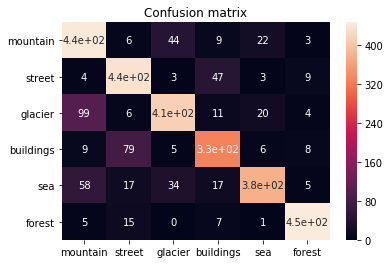

In [32]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=classes, 
           yticklabels=classes, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [33]:
model.save('./model.h5')

model.save_weights('./model_weights.h5')